In [0]:
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import clear_output

# **Creating the Model**

## Initializing Model Values
We set up the initial conditions
*   Initial infected
*   Initial susceptible as the rest of the population
*   Initial recovered as 0 people

## Defining Differential Equations
### Variables:
* $N$ is the total population
* $S$ is the current susceptible population
* $I$ is the current infected population
* $R$ is the current recovered population
* $\beta$ (beta) is the rate of infections per interaction
* $\gamma$ (gamma) is the rate of recovery for an infection

### Equations
* The rate of change for the susceptible population is
$$\frac{dS}{dt}=-\frac{\beta SI}{N}$$
> Because of all the interactions between susceptible and infected people, a portion of the susceptible people become infected
* The rate of change for the infected population is
$$\frac{dI}{dt}=\frac{\beta SI}{N}-\gamma I$$
> The current number of active infections is increased by the new infections, and decreased by number of people recovering
* The rate of change for the recovered (removed) population is
$$\frac{dR}{dt}=\gamma I$$
> The recovered population is the sum of all recoveries over time

* Additionally, we know that at any time the population will be constant
$$S + I + R = N$$
$$dS + dI + dR = 0$$

In [11]:
p = 100000

initial_infected = p / 1000
initial_susceptible = p - initial_infected
initial_recovered = 0

def dSdt(S, I, R):
  return -beta * S * I / p
def dIdt(S, I, R):
  return (beta * S * I / p) - (gamma * I)
def dRdt(S, I, R):
  return gamma * I
print("Initial Infected: ", initial_infected)
print("Initial Susceptible ", initial_susceptible)
print("Initial Recovered: ", initial_recovered)

Initial Infected:  100.0
Initial Susceptible  99900.0
Initial Recovered:  0


We give initial values to $\beta$ and $\gamma$ and define our timespan

> `dt` is our artificial, finite $dt$ because we will use a numerical solution for the differential equations, not an analytical one

In [0]:
beta = 0.15
gamma = 0.06

dt = 0.001
max_time = 180
time = np.arange(0, max_time + dt, dt)

# **Simulation**
Now it's time to actually run the simulation, there are 2 steps
1. Create the lists for $S$, $I$, and $R$ over time, with the first elements being the initial conditions
2. At every time $t$

    a. Calculate the new variable values:
    $$
    \Delta x = \frac{dx}{dt}(t) * \Delta t
    \\\\
    x_{t} = x_{t-1} + \Delta x
    $$
    > $x$ represents $S$, $I$, and $R$

    b. Add new values to their lists

In [0]:
def simulate():
  S = [initial_susceptible]
  I = [initial_infected]
  R = [initial_recovered]
  for t in time[1:]:
    newS = S[-1] + dSdt(S[-1], I[-1], R[-1]) * dt
    newI = I[-1] + dIdt(S[-1], I[-1], R[-1]) * dt
    newR = R[-1] + dRdt(S[-1], I[-1], R[-1]) * dt
    S.append(newS)
    I.append(newI)
    R.append(newR)
  return S, I, R

# **Visualizing the results**
We create a new plot, with the $S$, $I$, and $R$ values on the y-axis and the time on the x-axis

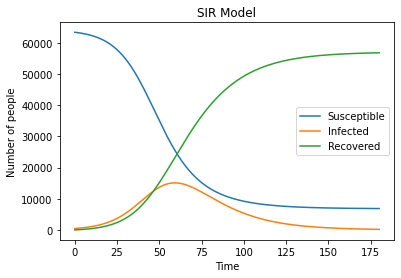

In [19]:
def visualize(b=None):
  fig, ax = plt.subplots()
  S, I, R = simulate()
  ax.set_title("SIR Model")
  ax.plot(time, S, label="Susceptible")
  ax.plot(time, I, label="Infected")
  ax.plot(time, R, label="Recovered")
  ax.set_xlabel("Time")
  ax.set_ylabel("Number of people")
  #ax.set_yscale("log")
  plt.legend()
visualize()

# **Configurable runs**
Here you can adjust any of the parameters and rerun the simulation to see how the affect the system

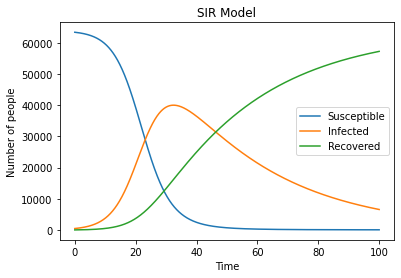

In [20]:
#@title Parameters {run:"auto"}

p = 63800 #@param {type:"slider", min:0, max:100000, step:100}

percent_infected = 0.7 #@param {type:"slider", min:0, max:100, step:0.1}

beta = 0.25 #@param {type:"slider", min:0, max:2, step:0.01}
gamma = 0.03 #@param {type:"slider", min:0, max:1, step:0.01}

dt = 0.0156 #@param {type:"slider", min:0, max:0.5, step:0.0001}
max_time = 100 #@param {type:"slider", min:0, max:300, step:1}
initial_infected = p * percent_infected * 0.01
initial_susceptible = p - initial_infected
initial_recovered = 0
time = np.arange(0, max_time + dt, dt)

clear_output()
visualize()